### Enter the path of the file to upload, the title, and the email to send it to
Make sure all three are correct. If you submit more than once with the same email, the website won't accept it until the first image is printed

In [40]:
filepath = "images/test_img.jpg"
email = "contact@bioartbot.org"
title = "Test Photo"

## Take the wild image-processing ride!

Run the code below to create the image that will be sent to BioArtBot

Inspect it to make sure it looks good.

Processed Image


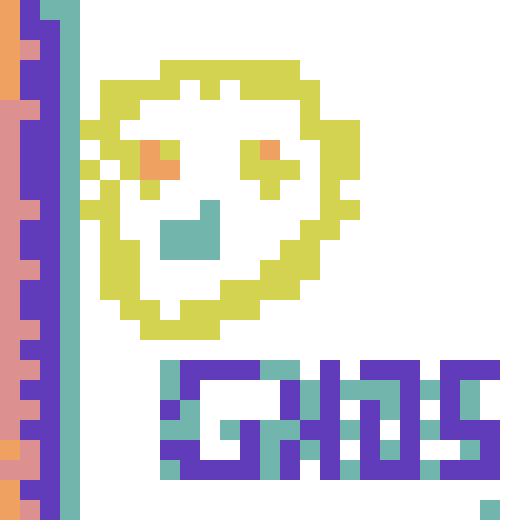

In [41]:
from PIL import Image
from PIL import ImagePalette
from PIL import ImageOps
import numpy as np
import pandas as pd
import requests
import json
from requests.structures import CaseInsensitiveDict

f_size=(26,26)

#low the image with mpimg.read
img = Image.open(filepath)
original_shape=[int(img.size[0]/10), int(img.size[1]/10)]
#print(original_shape)

img.thumbnail(f_size)
img = ImageOps.pad(img,size=f_size, color=(255,255,255))

# Send a GET method to http://www.bioartbot.org/artpieces and get the response
response = requests.get('http://www.bioartbot.org/artpieces')
# parse the response into a json
data = json.loads(response.text)

pall = []

for i in data["meta"]["bacterial_colors"]:
    pall = pall + [i["rgba"][:-1]]

#fill pall with (0,0,0) until have 256 as the length
pall = pall + [(255,255,255)] * (256 - len(pall))

#flatten pall
pall = [item for sublist in pall for item in sublist]

#create a new palette
p_img = Image.new('P', (1, 1))
p_img.putpalette(pall)

img2 = img.quantize("P", palette=p_img, dither=1)

print("Processed Image")
display(img2.resize((f_size[0]*20, f_size[1]*20)))





### Run the code below to send the image to BioArtBot

A good response is `{"data":null}\n`

In [34]:
color_dict = {}
for i in range(0,img2.size[0]):
    for j in range(0,img2.size[1]):
        color = str(img2.getpixel((i,j)) + 1)
        if color != "6":
            #append color to color_dict[color]
            if color in color_dict:
                color_dict[color].append((j,i))
            else:
                color_dict[color] = [(j,i)]
                

data = {
    "email": email,
    "title": title,
    "art": color_dict,
    "canvas_size":{"x":f_size[0],"y":f_size[1]},
}

data_json = json.dumps(data)

headers = CaseInsensitiveDict()
headers["Content-Type"] = "application/json"
headers["dataType"] = "json"

#send a post request to http://www.bioartbot.org/artpieces
response = requests.post('http://www.bioartbot.org/artpieces', data=data_json, headers=headers)
display(response.text)

'{"data":null}\n'